In [1]:
import pandas
dataset = pandas.read_csv("Abalon_age_prediction_dataset.csv")
dataset.columns=['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']


In [2]:
import numpy as np
import pandas
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import seaborn as sns
import datetime

In [3]:
print(dataset.head(20))

   Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0    M   0.350     0.265   0.090        0.2255          0.0995   
1    F   0.530     0.420   0.135        0.6770          0.2565   
2    M   0.440     0.365   0.125        0.5160          0.2155   
3    I   0.330     0.255   0.080        0.2050          0.0895   
4    I   0.425     0.300   0.095        0.3515          0.1410   
5    F   0.530     0.415   0.150        0.7775          0.2370   
6    F   0.545     0.425   0.125        0.7680          0.2940   
7    M   0.475     0.370   0.125        0.5095          0.2165   
8    F   0.550     0.440   0.150        0.8945          0.3145   
9    F   0.525     0.380   0.140        0.6065          0.1940   
10   M   0.430     0.350   0.110        0.4060          0.1675   
11   M   0.490     0.380   0.135        0.5415          0.2175   
12   F   0.535     0.405   0.145        0.6845          0.2725   
13   F   0.470     0.355   0.100        0.4755          0.1675   
14   M   0

In [4]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 9 columns):
Sex               4176 non-null object
Length            4176 non-null float64
Diameter          4176 non-null float64
Height            4176 non-null float64
Whole weight      4176 non-null float64
Shucked weight    4176 non-null float64
Viscera weight    4176 non-null float64
Shell weight      4176 non-null float64
Rings             4176 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.7+ KB
None


In [5]:
#print(dataset.describe())
dataset.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [6]:
print(dataset.groupby('Rings').size())

Rings
1       1
2       1
3      15
4      57
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    102
16     67
17     58
18     42
19     32
20     26
21     14
22      6
23      9
24      2
25      1
26      1
27      2
29      1
dtype: int64


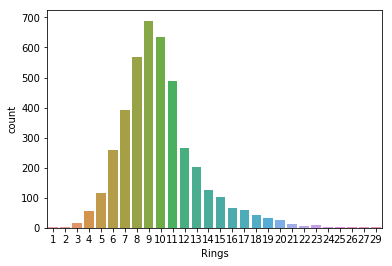

In [7]:
sns.countplot(x="Rings", data=dataset)
plt.show()

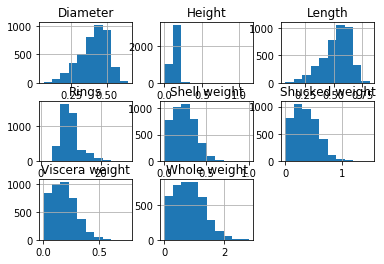

In [8]:
dataset.hist()
plt.show()


In [10]:
# pandas.plotting.scatter_matrix(dataset)
# plt.show()
columns=['Sex']
for col in columns:
    dataset[col].replace(['M'],0,inplace=True)
for col in columns:
    dataset[col].replace(['F'],1,inplace=True)
for col in columns:
    dataset[col].replace(['I'],2,inplace=True)
dataset.head(20) 

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,2,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
5,1,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
6,1,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
7,0,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
8,1,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19
9,1,0.525,0.380,0.140,0.6065,0.1940,0.1475,0.210,14


In [13]:
array = dataset.values
x=dataset.drop('Rings',axis=1)#x is i/p features as we drop the target col
y=dataset['Rings']
validation_size = 0.25
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(x,y, test_size=validation_size, random_state=seed)


In [14]:
# Make predictions on validation dataset
Logistic_regression_model = LogisticRegression()
Logistic_regression_model.fit(X_train, Y_train)
predictions = Logistic_regression_model.predict(X_validation)


In [17]:
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
print(accuracy_score(Y_validation,predictions))

0.2413793103448276
